{'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'], 'Cárdenas': ['Minatitlán', 'Villahermosa'], 'Cd del Cármen': ['Campeche', 'Villahermosa'], 'CDMX': ['Puebla'], 'Chetumal': ['Campeche', 'Playa del Cármen'], 'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'], 'Córdoba': ['Orizaba', 'Veracruz'], 'Cancún': ['Mérida', 'Playa del Cármen'], 'Huatulco': ['Puerto Escondido', 'Salina Cruz'], 'Ixtepec': ['Juchitán'], 'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'], 'Minatitlán': ['Cárdenas', 'Coatzacoalcos'], 'Matamoros': ['Reynosa', 'Tampico'], 'Mérida': ['Campeche', 'Cancún'], 'Oaxaca': ['Puebla', 'Tehuantepec'], 'Orizaba': ['Córdoba', 'Puebla'], 'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'], 'Playa del Cármen': ['Cancún', 'Chetumal'], 'Poza Rica': ['Tuxpan', 'Veracruz'], 'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'], 'Puerto Escondido': ['Huatulco'], 'Reynosa': ['Matamoros'], 'Salina Cruz': ['Huatulco', 'Tehuantepec'], 'San Cristóbal de las Casas': ['Palenque

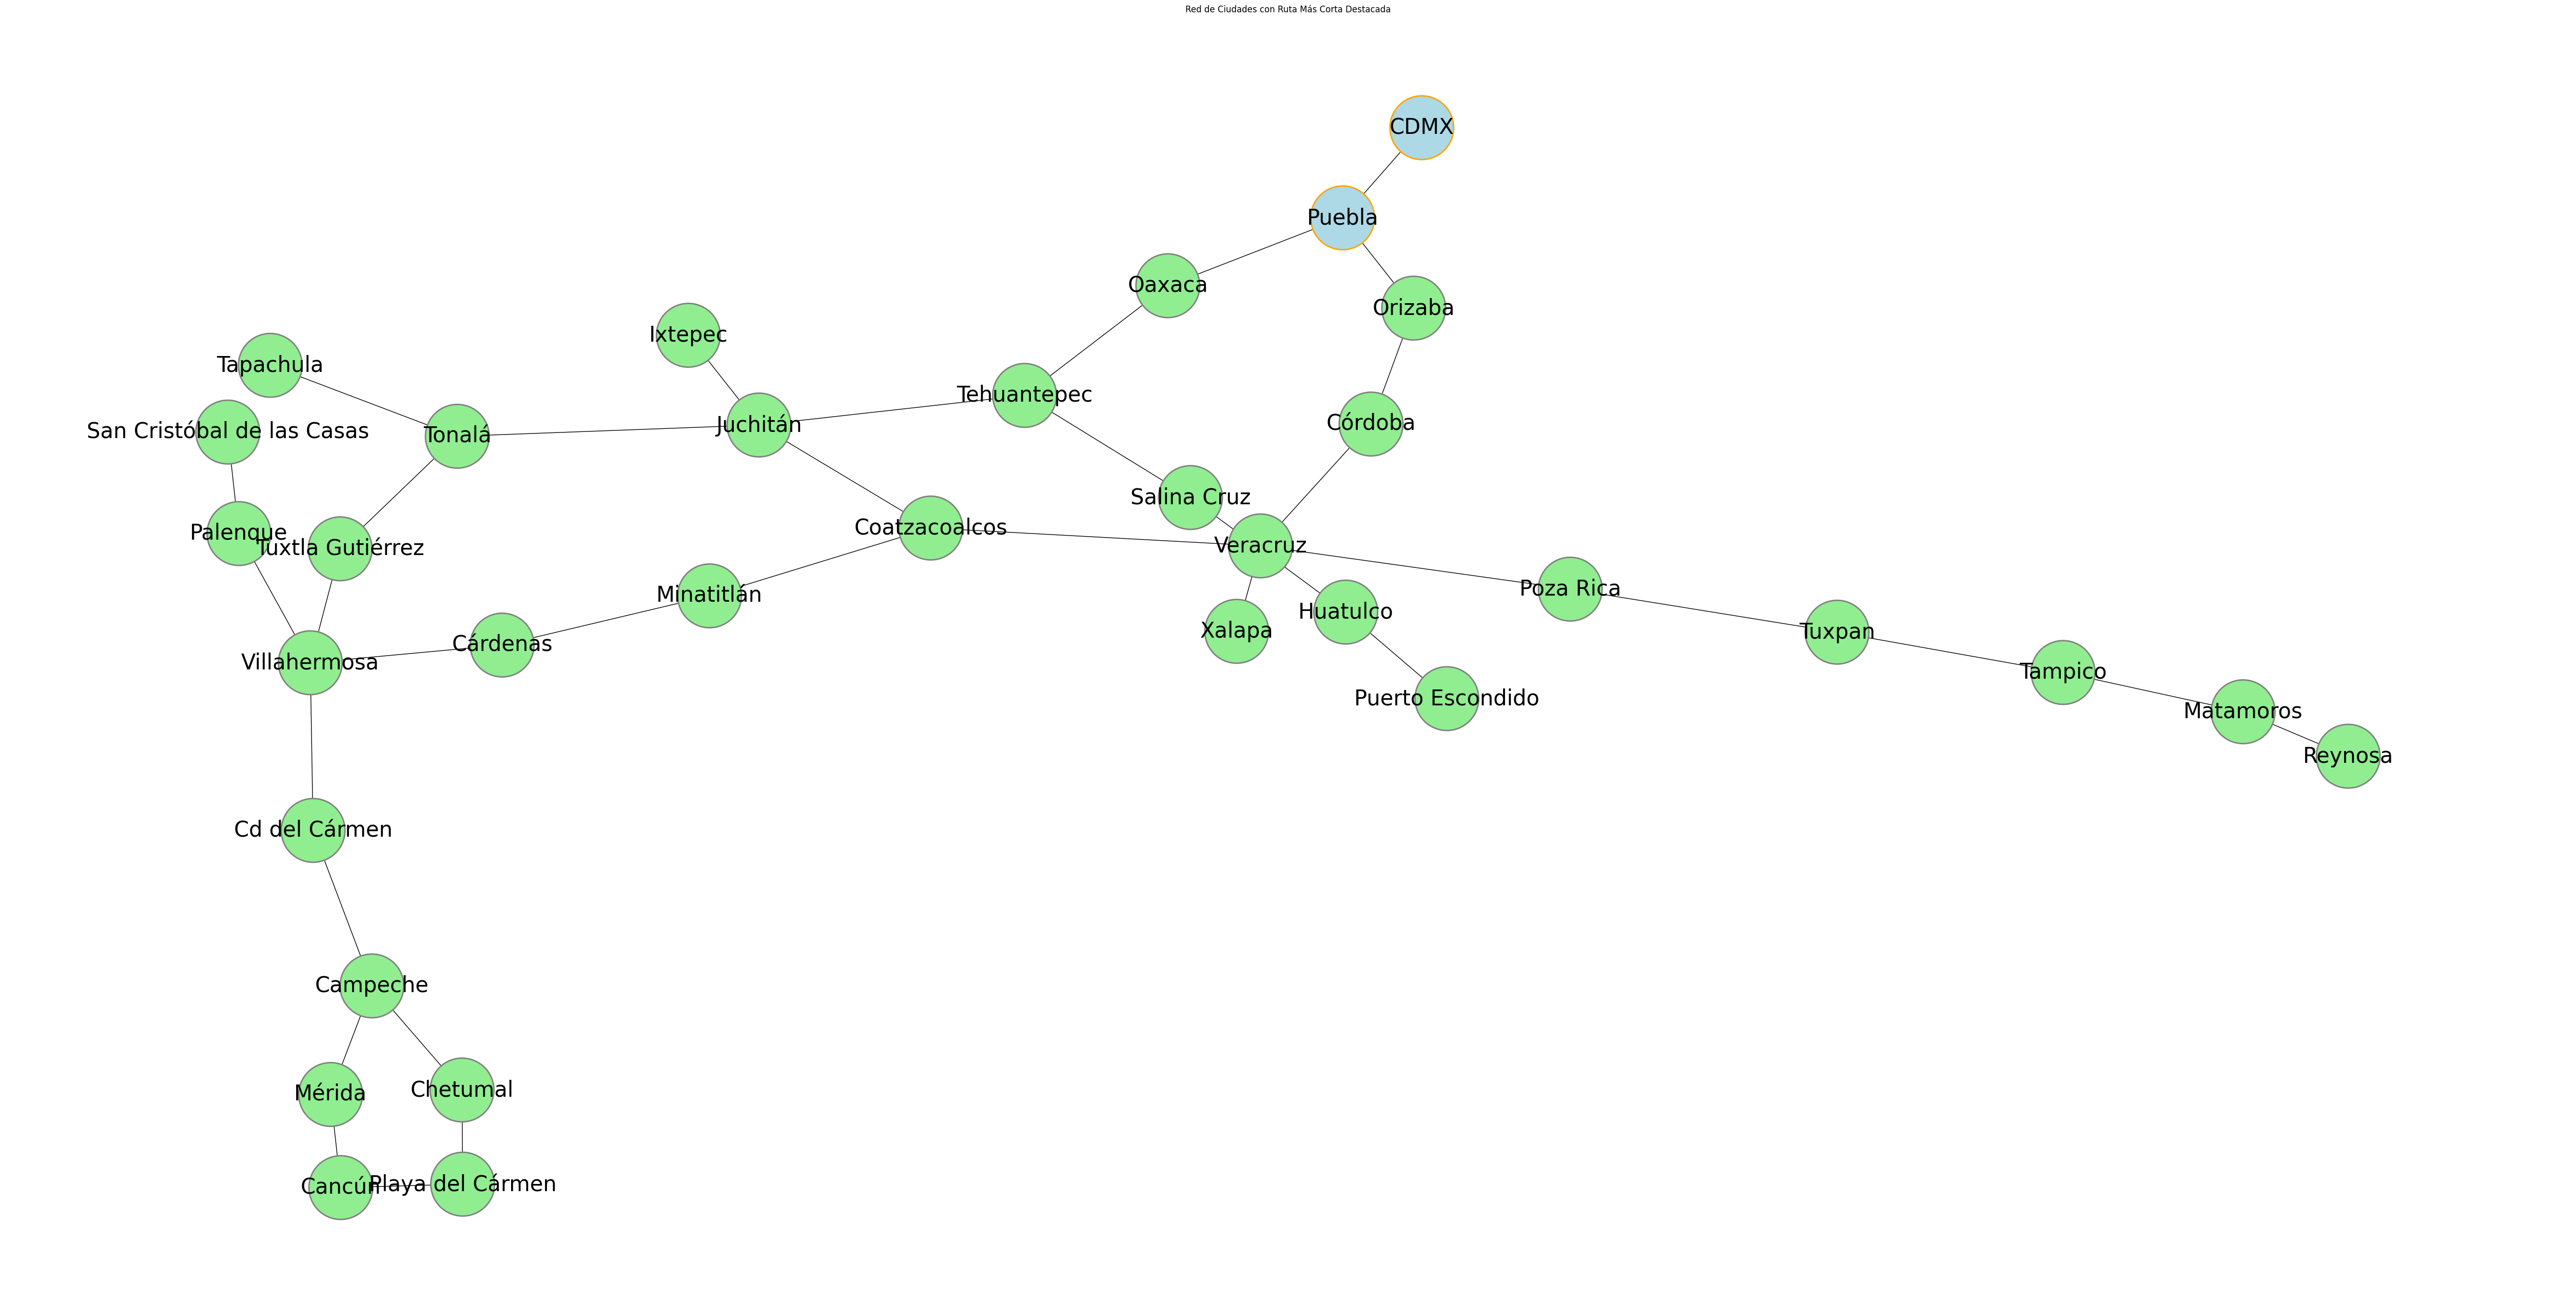

In [3]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'],
    'Cárdenas': ['Minatitlán', 'Villahermosa'],
    'Cd del Cármen': ['Campeche', 'Villahermosa'],
    'CDMX': ['Puebla'],
    'Chetumal': ['Campeche', 'Playa del Cármen'],
    'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'],
    'Córdoba': ['Orizaba', 'Veracruz'],
    'Cancún': ['Mérida', 'Playa del Cármen'],
    'Huatulco': ['Puerto Escondido', 'Salina Cruz'],
    'Ixtepec': ['Juchitán'],
    'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'],
    'Minatitlán': ['Cárdenas', 'Coatzacoalcos'],
    'Matamoros': ['Reynosa', 'Tampico'],
    'Mérida': ['Campeche', 'Cancún'],
    'Oaxaca': ['Puebla', 'Tehuantepec'],
    'Orizaba': ['Córdoba', 'Puebla'],
    'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'],
    'Playa del Cármen': ['Cancún', 'Chetumal'],
    'Poza Rica': ['Tuxpan', 'Veracruz'],
    'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'],
    'Puerto Escondido': ['Huatulco'],
    'Reynosa': ['Matamoros'],
    'Salina Cruz': ['Huatulco', 'Tehuantepec'],
    'San Cristóbal de las Casas': ['Palenque'],
    'Tampico': ['Matamoros', 'Tuxpan'],
    'Tapachula': ['Tonalá'],
    'Tehuantepec': ['Juchitán', 'Oaxaca', 'Salina Cruz'],
    'Tonalá': ['Tapachula', 'Tuxtla Gutiérrez', 'Juchitán'],
    'Tuxpan': ['Poza Rica', 'Tampico'],
    'Tuxtla Gutiérrez': ['Tonalá', 'Villahermosa'],
    'Veracruz': ['Coatzacoalcos', 'Córdoba', 'Xalapa', 'Poza Rica'],
    'Villahermosa': ['Cárdenas', 'Cd del Cármen', 'Palenque', 'Tuxtla Gutiérrez'],
    'Xalapa': ['Veracruz']
}
# Nodo de inicio y nodo objetivo
print(grafo)
nodo_inicio = input('Ingrese la ciudad de inicio: ')
nodo_objetivo = input('Ingrese la ciudad de destino: ')


# Método para encontrar todas las rutas (DFS)
def encontrar_todas_las_rutas(grafo, inicio, objetivo, ruta=[], iteraciones=[0]):
    iteraciones[0] += 1  # Usamos una lista para mutabilidad y mantener el conteo a través de llamadas recursivas
    ruta = ruta + [inicio]
    if inicio == objetivo:
        return [ruta]
    if inicio not in grafo:
        return []
    rutas = []
    for nodo in grafo[inicio]:
        if nodo not in ruta:
            nuevas_rutas = encontrar_todas_las_rutas(grafo, nodo, objetivo, ruta, iteraciones)
            for nueva_ruta in nuevas_rutas:
                rutas.append(nueva_ruta)
    return rutas

# Método para encontrar la ruta más corta (BFS)
def bfs_ruta_mas_corta(grafo, inicio, objetivo):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    iteraciones_bfs = 0

    while cola:
        nodo_actual, camino = cola.popleft()
        iteraciones_bfs += 1

        if nodo_actual == objetivo:
            return camino, iteraciones_bfs

        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    cola.append((vecino, camino + [vecino]))

    return None, iteraciones_bfs

# Encuentra todas las rutas y la ruta más corta
iteraciones_dfs = [0]
todas_las_rutas = encontrar_todas_las_rutas(grafo, nodo_inicio, nodo_objetivo, [], iteraciones_dfs)
ruta_mas_corta, iteraciones_bfs = bfs_ruta_mas_corta(grafo, nodo_inicio, nodo_objetivo)

# Imprime los resultados
if todas_las_rutas:
    print(f"Se encontraron {len(todas_las_rutas)} rutas de '{nodo_inicio}' a '{nodo_objetivo}'. Total iteraciones DFS: {iteraciones_dfs[0]}")
    for ruta in todas_las_rutas:
        print(' -> '.join(ruta))
else:
    print("No se encontró un camino al nodo objetivo usando DFS.")

if ruta_mas_corta:
    print(f"\nLa ruta más corta de '{nodo_inicio}' a '{nodo_objetivo}' es: {' -> '.join(ruta_mas_corta)}. Total iteraciones BFS: {iteraciones_bfs}")
else:
    print("No se encontró un camino al nodo objetivo usando BFS.")
    
# Creamos el gráfico para visualizar el grafo, destacando la ruta más corta
G = nx.Graph(grafo)
pos = nx.spring_layout(G)  # Posicionamiento de los nodos

# Colores de los nodos: uno para los nodos en la ruta más corta, otro para los demás
node_colors = ['lightblue' if node in ruta_mas_corta else 'lightgreen' for node in G.nodes()]

# Colores de los bordes de los nodos: uno para el inicio/fin, otro para los intermedios
node_edge_colors = ['orange' if node == nodo_inicio or node == nodo_objetivo else 'gray' for node in G.nodes()]

plt.figure(figsize=(50, 25))  # Ajustamos el tamaño de la figura para una mejor visualización
nx.draw(G, pos, with_labels=True, node_color=node_colors, edgecolors=node_edge_colors, node_size=8000, font_size=30, linewidths=2)
plt.title("Red de Ciudades con Ruta Más Corta Destacada")
plt.show()
